<a href="https://colab.research.google.com/github/soumik03/Major_Project_Bioinformatics/blob/main/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-04 15:30:16--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   229MB/s    in 0.4s    

2022-05-04 15:30:17 (229 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [2]:
import pandas as pd

In [30]:
df = pd.read_csv('Staphylococcus_aureus_03_bioactivity_data_curated_new.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [31]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [32]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [33]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [34]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,506.242,5.41390,4.0,5.0
1,376.287,4.42670,3.0,3.0
2,287.227,2.81260,0.0,6.0
3,293.662,3.44290,1.0,5.0
4,315.281,3.31762,0.0,6.0
...,...,...,...,...
891,468.649,6.43280,2.0,5.0
892,462.548,5.58760,2.0,5.0
893,444.558,5.44850,2.0,5.0
894,502.666,6.97640,2.0,5.0


In [35]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive
...,...,...,...,...
891,CHEMBL4745545,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate
892,CHEMBL4785353,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2cc(...,1340.00,intermediate
893,CHEMBL4779057,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate
894,CHEMBL4757594,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate


Now, let's combine the 2 DataFrame

In [36]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [37]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active,506.242,5.41390,4.0,5.0
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active,376.287,4.42670,3.0,3.0
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive,287.227,2.81260,0.0,6.0
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive,293.662,3.44290,1.0,5.0
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive,315.281,3.31762,0.0,6.0
...,...,...,...,...,...,...,...,...
891,CHEMBL4745545,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate,468.649,6.43280,2.0,5.0
892,CHEMBL4785353,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2cc(...,1340.00,intermediate,462.548,5.58760,2.0,5.0
893,CHEMBL4779057,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate,444.558,5.44850,2.0,5.0
894,CHEMBL4757594,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,1340.00,intermediate,502.666,6.97640,2.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [38]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [39]:
df_combined.standard_value.describe()

count    8.960000e+02
mean     1.154163e+06
std      1.776272e+07
min      3.800000e-01
25%      1.000000e+03
50%      9.950000e+03
75%      5.332500e+04
max      5.000345e+08
Name: standard_value, dtype: float64

In [40]:
-np.log10( (10**-9)* 100000000 )

1.0

In [41]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [42]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [43]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,active,506.242,5.41390,4.0,5.0,8.00
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,active,376.287,4.42670,3.0,3.0,16.00
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,inactive,287.227,2.81260,0.0,6.0,151356.12
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,inactive,293.662,3.44290,1.0,5.0,11748975.55
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,inactive,315.281,3.31762,0.0,6.0,4786300.92
...,...,...,...,...,...,...,...,...
891,CHEMBL4745545,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,468.649,6.43280,2.0,5.0,1340.00
892,CHEMBL4785353,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2cc(...,intermediate,462.548,5.58760,2.0,5.0,1340.00
893,CHEMBL4779057,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,444.558,5.44850,2.0,5.0,1340.00
894,CHEMBL4757594,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,502.666,6.97640,2.0,5.0,1340.00


In [44]:
df_norm.standard_value_norm.describe()

count    8.960000e+02
mean     6.598283e+05
std      6.047932e+06
min      3.800000e-01
25%      1.000000e+03
50%      9.950000e+03
75%      5.332500e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [45]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,active,506.242,5.41390,4.0,5.0,8.096910
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,active,376.287,4.42670,3.0,3.0,7.795880
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,inactive,287.227,2.81260,0.0,6.0,3.820000
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,inactive,293.662,3.44290,1.0,5.0,1.930000
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,inactive,315.281,3.31762,0.0,6.0,2.320000
...,...,...,...,...,...,...,...,...
891,CHEMBL4745545,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,468.649,6.43280,2.0,5.0,5.872895
892,CHEMBL4785353,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2cc(...,intermediate,462.548,5.58760,2.0,5.0,5.872895
893,CHEMBL4779057,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,444.558,5.44850,2.0,5.0,5.872895
894,CHEMBL4757594,C/C(=C/c1ccccc1)Cn1cc(CCCCCc2nc(N)[nH]c2-c2ccc...,intermediate,502.666,6.97640,2.0,5.0,5.872895


In [46]:
df_final.pIC50.describe()

count    896.000000
mean       5.182193
std        1.352864
min        1.000000
25%        4.273069
50%        5.002182
75%        6.000000
max        9.420216
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [47]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,active,506.242,5.41390,4.0,5.0,8.096910
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,active,376.287,4.42670,3.0,3.0,7.795880
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,inactive,287.227,2.81260,0.0,6.0,3.820000
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,inactive,293.662,3.44290,1.0,5.0,1.930000
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,inactive,315.281,3.31762,0.0,6.0,2.320000
...,...,...,...,...,...,...,...,...
883,CHEMBL4762632,COc1ccc(-n2cc(COc3ccc(/C=N/Nc4nc(-c5cc6cccc(Br...,inactive,629.496,6.29330,1.0,11.0,4.486782
884,CHEMBL4741186,COc1ccc(-n2cc(COc3ccc(/C=N/Nc4nc(-c5cc6cc(Br)c...,inactive,659.522,6.30190,1.0,12.0,4.920819
885,CHEMBL4800245,COc1ccc(-n2cc(COc3ccc(/C=N/Nc4nc(-c5cc6cccc(OC...,inactive,580.626,5.53940,1.0,12.0,4.869666
886,CHEMBL4740160,CCCCCCc1ccc(C(=O)NCCn2cc(CCCCCc3c[nH]c(N)n3)nn...,active,451.619,4.09170,3.0,6.0,6.154902


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

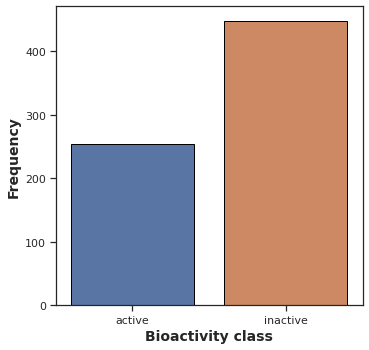

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

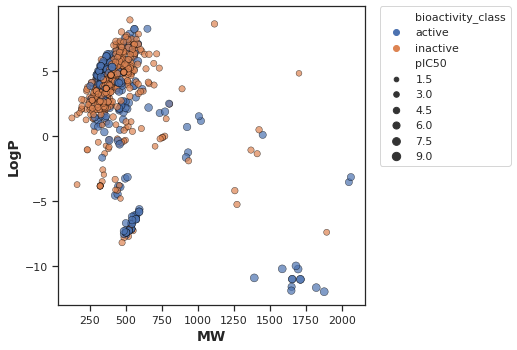

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

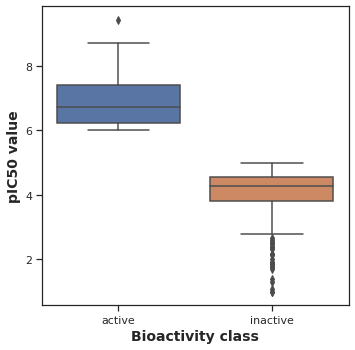

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.114697e-107,0.05,Different distribution (reject H0)


#### **MW**

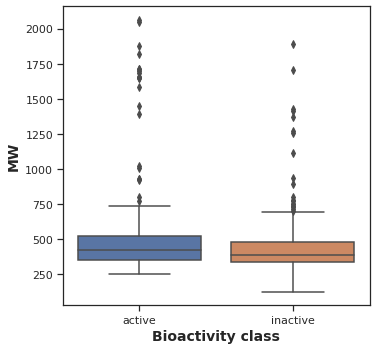

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [55]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,46945.5,0.000079,0.05,Different distribution (reject H0)


#### **LogP**

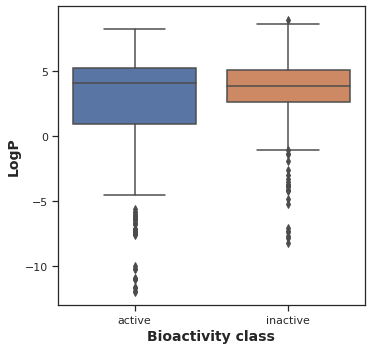

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [57]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,53025.5,0.078399,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

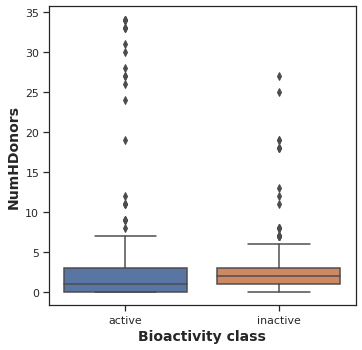

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [59]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,44327.5,4.245132e-07,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

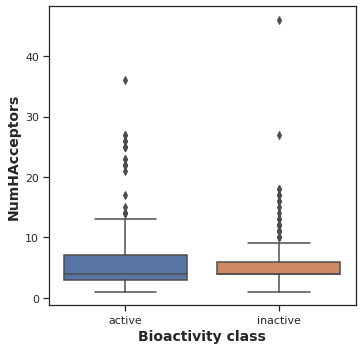

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,53112.0,0.080522,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP and NumHAcceptors exhibited ***no difference*** between the **actives** and **inactives** while the other 2 descriptors (MW and NumHDonors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [62]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: Staphylococcus_aureus_03_bioactivity_data_curated_new.csv (deflated 82%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 40%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
